In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

plt.style.use("cms")
# %matplotlib inline

In [57]:
profile_files = [
    "pu_distributions_data_2016.root",
    "pu_distributions_data_2017.root",
    "pu_distributions_data_2018.root",
]
pu_profiles = []
for profile in profile_files:
    pu_profiles.append(uproot.open(
        "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/"
        "UserCode/ICHiggsTauTau/Analysis/HiggsTauTau/input/pileup/"
        "{}".format(profile)
    )["pileup"])

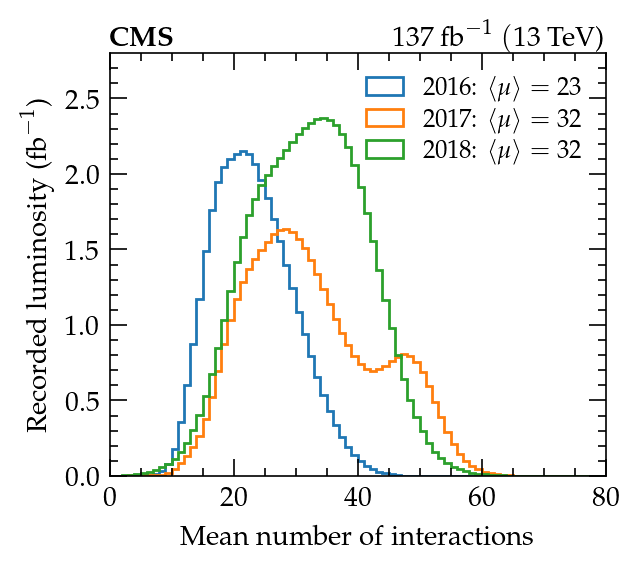

In [92]:
fig, ax = plt.subplots(figsize=(3.2, 2.8), dpi=200)

#nbins = pu_profiles[0].numbins
for profile in pu_profiles:
    binning = profile.edges
    recorded_lumi = profile.values*pow(10,-9)

    ax.hist(binning[:-1], bins=binning, weights=recorded_lumi, histtype='step',)

#ax.axhline(0., color='black', ls='--')
ax.set_xlim(0., 80.)
ax.set_ylim(0., 2.8)

ax.legend([
    r"2016: $\langle\mu \rangle =23$",
    r"2017: $\langle\mu \rangle =32$",
    r"2018: $\langle\mu \rangle =32$"], 
    loc=1, labelspacing=0.2, frameon=False,
    fontsize=9.,
)

ax.text(
    0, 1, r'$\textbf{CMS}$',
    ha='left', va='bottom',
    transform=ax.transAxes,
)
ax.text(
    1, 1, r'$137\ \mathrm{fb}^{-1}$ $(13\ \mathrm{TeV}$)',
    ha='right', va='bottom',
    transform=ax.transAxes,
)

ax.set_xlabel("Mean number of interactions")
ax.set_ylabel(r'Recorded luminosity ($\mathrm{fb}^{-1}$)')

plt.savefig("plots/pileup_data_plot.pdf")
plt.savefig("plots/pileup_data_plot.png")

pass